In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import unittest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
path = "/home/kalisto/Documents/NIR/homework_spbu_dl_2025/homeworks/data/YearPredictionMSD.txt"
data = pd.read_csv(path, header=None)

y = torch.tensor(data.iloc[:, 0].values, dtype=torch.float32).view(-1, 1)
X = torch.tensor(data.iloc[:, 1:].values, dtype=torch.float32)

X_train = X[:14000]
y_train = y[:14000]
X_test = X[509345:]
y_test = y[509345:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


torch.Size([14000, 90]) torch.Size([14000, 1])
torch.Size([6000, 90]) torch.Size([6000, 1])


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


1922
2011


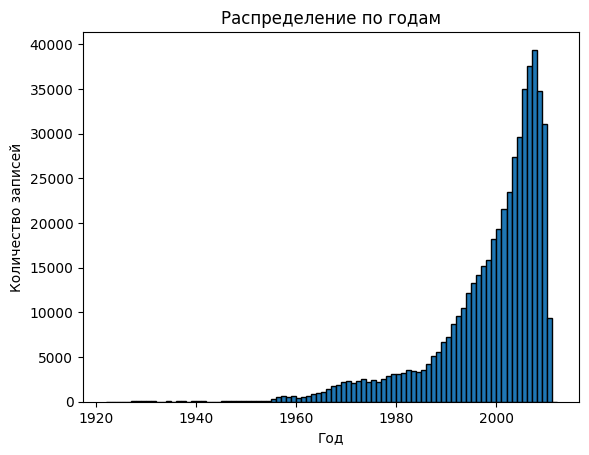

In [4]:
years = data.iloc[:, 0]
print(years.min())
print(years.max())
plt.hist(years, bins=range(int(years.min()), int(years.max())+2), edgecolor='black')
plt.xlabel('Год')
plt.ylabel('Количество записей')
plt.title('Распределение по годам')
plt.show()

In [5]:
corr_matrix = data.corr()
year_corr = corr_matrix.iloc[0, 1:]  # Корреляция года с остальными столбцами
print(year_corr)


1     0.225374
2     0.021402
3    -0.139541
4    -0.003286
5     0.019338
        ...   
86   -0.053548
87    0.024589
88   -0.037432
89    0.008380
90   -0.056485
Name: 0, Length: 90, dtype: float64


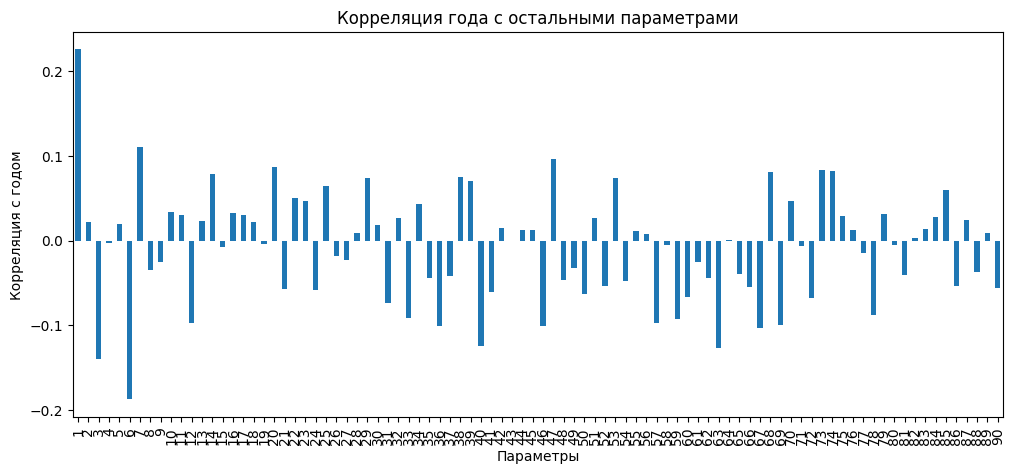

In [6]:
year_corr.plot(kind='bar', figsize=(12, 5))
plt.xlabel('Параметры')
plt.ylabel('Корреляция с годом')
plt.title('Корреляция года с остальными параметрами')
plt.show()


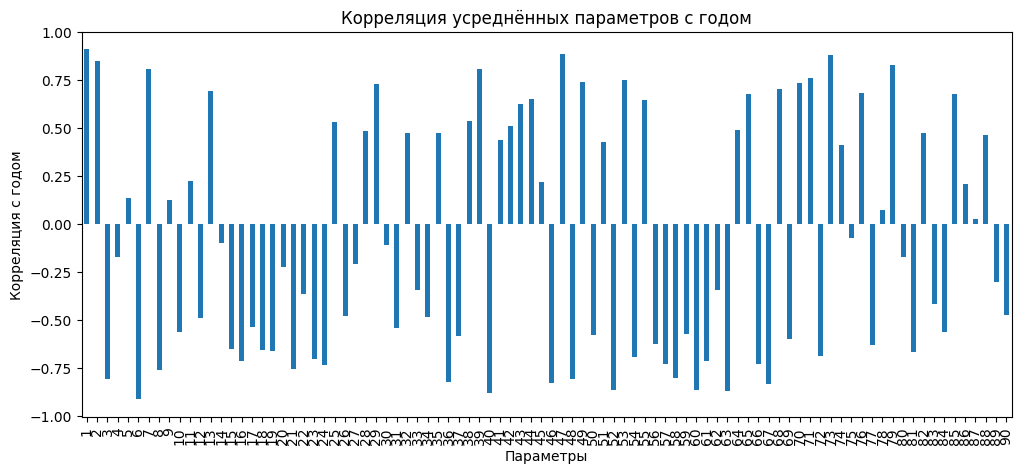

In [7]:

df_grouped = data.groupby(data.columns[0]).mean().reset_index(drop=False)
df_grouped = df_grouped.rename(columns={df_grouped.columns[0]: 'year'})


corr_matrix = df_grouped.corr()
year_corr = corr_matrix.iloc[0, 1:]

year_corr.plot(kind='bar', figsize=(12,5))
plt.xlabel('Параметры')
plt.ylabel('Корреляция с годом')
plt.title('Корреляция усреднённых параметров с годом')
plt.show()


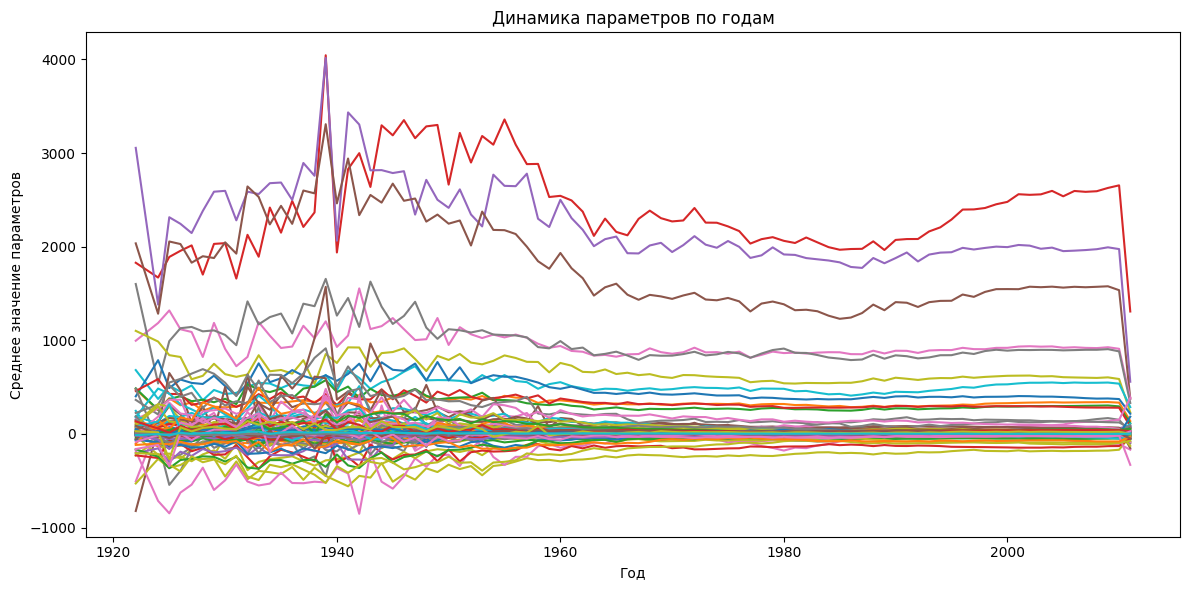

In [8]:
data = data.rename(columns={data.columns[0]: 'year'})

df_grouped = data.groupby('year').mean().reset_index()

corr_over_years = df_grouped.set_index('year')

plt.figure(figsize=(12, 6))
for col in corr_over_years.columns:
    plt.plot(corr_over_years.index, corr_over_years[col], label=col)

plt.xlabel('Год')
plt.ylabel('Среднее значение параметров')
plt.title('Динамика параметров по годам')
plt.tight_layout()
plt.show()


Epoch 1/200, Loss: 4566.6523
Epoch 2/200, Loss: 4562.7810
Epoch 3/200, Loss: 4556.6712
Epoch 4/200, Loss: 4548.6982
Epoch 5/200, Loss: 4539.1146
Epoch 6/200, Loss: 4528.0781
Epoch 7/200, Loss: 4515.6922
Epoch 8/200, Loss: 4502.0198
Epoch 9/200, Loss: 4487.1060
Epoch 10/200, Loss: 4470.9791
Epoch 11/200, Loss: 4453.6647
Epoch 12/200, Loss: 4435.1826
Epoch 13/200, Loss: 4415.5482
Epoch 14/200, Loss: 4394.7747
Epoch 15/200, Loss: 4372.8812
Epoch 16/200, Loss: 4349.8797
Epoch 17/200, Loss: 4325.7843
Epoch 18/200, Loss: 4300.6105
Epoch 19/200, Loss: 4274.3695
Epoch 20/200, Loss: 4247.0764
Epoch 21/200, Loss: 4218.7481
Epoch 22/200, Loss: 4189.3965
Epoch 23/200, Loss: 4159.0373
Epoch 24/200, Loss: 4127.6878
Epoch 25/200, Loss: 4095.3594
Epoch 26/200, Loss: 4062.0702
Epoch 27/200, Loss: 4027.8366
Epoch 28/200, Loss: 3992.6704
Epoch 29/200, Loss: 3956.5937
Epoch 30/200, Loss: 3919.6194
Epoch 31/200, Loss: 3881.7647
Epoch 32/200, Loss: 3843.0478
Epoch 33/200, Loss: 3803.4877
Epoch 34/200, Loss:

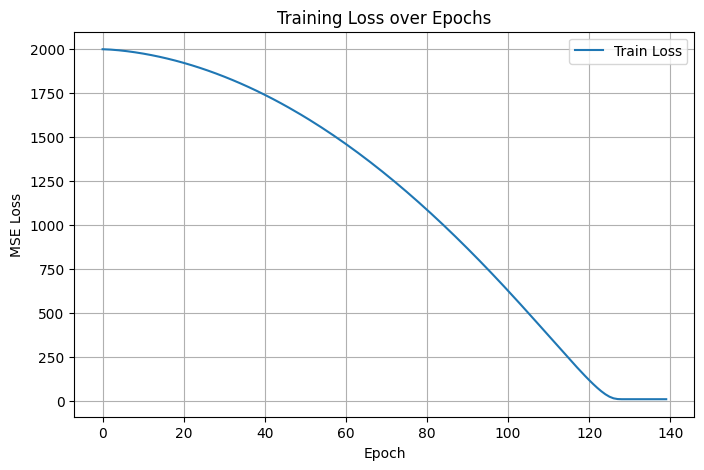

In [108]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler, random_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import copy
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NAdam(Optimizer):
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8, schedule_decay=0.004, weight_decay=0):
        defaults = dict(lr=lr, betas=betas, eps=eps, schedule_decay=schedule_decay, weight_decay=weight_decay)
        super(NAdam, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('NAdam does not support sparse gradients')
                state = self.state[p]
                if len(state) == 0:
                    state['step'] = 0
                    state['m'] = torch.zeros_like(p.data)
                    state['v'] = torch.zeros_like(p.data)
                    state['m_schedule'] = 1.0
                m, v = state['m'], state['v']
                beta1, beta2 = group['betas']
                state['step'] += 1
                t = state['step']
                m_schedule = state['m_schedule']
                m_schedule_new = m_schedule * beta1
                m_schedule_next = m_schedule_new * (1 - 0.5 * (0.96 ** (t * group['schedule_decay'])))
                m_schedule_next_next = m_schedule_next * (1 - 0.5 * (0.96 ** ((t+1) * group['schedule_decay'])))
                state['m_schedule'] = m_schedule_next
                if group['weight_decay'] != 0:
                    grad = grad.add(group['weight_decay'], p.data)
                m_t = beta1 * m + (1 - beta1) * grad
                v_t = beta2 * v + (1 - beta2) * grad * grad
                m_hat = m_t / (1 - m_schedule_next_next)
                grad_term = (beta1 * m_hat + (1 - beta1) * grad / (1 - m_schedule_next_next)) / (torch.sqrt(v_t / (1 - beta2 ** t)) + group['eps'])
                p.data.add_(grad_term, alpha=-group['lr'])
                state['m'], state['v'] = m_t, v_t
        return loss

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.numpy())
X_test_scaled = scaler.transform(X_test.numpy())
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = y_train.clone().detach()
y_test_tensor = y_test.clone().detach()
if y_train_tensor.dtype != torch.float32:
    y_train_tensor = y_train_tensor.float()
if y_test_tensor.dtype != torch.float32:
    y_test_tensor = y_test_tensor.float()
if y_train_tensor.dim() == 1:
    y_train_tensor = y_train_tensor.unsqueeze(1)
if y_test_tensor.dim() == 1:
    y_test_tensor = y_test_tensor.unsqueeze(1)
X_train_scaled = X_train_scaled.to(device)
X_test_scaled = X_test_scaled.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.Dropout(0.2),
            nn.Sigmoid(),
            nn.BatchNorm1d(16),
            nn.Linear(16, 8),
            nn.Dropout(0.2),
            nn.Sigmoid(),
            nn.BatchNorm1d(8),
            nn.Linear(8, 4),
            nn.Dropout(0.2),
            nn.Sigmoid(),
            nn.BatchNorm1d(4),
            nn.Linear(4, 1)
        )
    def forward(self, x):
        return self.network(x)

model = NeuralNet(X_train.shape[1])
model = model.to(device)
criterion = nn.MSELoss()
optimizer = NAdam(model.parameters(), lr=0.00025)

dataset = TensorDataset(X_train_scaled, y_train_tensor)
val_ratio = 0.2
val_size = int(len(dataset) * val_ratio)
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

y_train_np = y_train_tensor.cpu().numpy().ravel()
unique, counts = np.unique(y_train_np, return_counts=True)
use_sampler = False
sampler = None
if unique.shape[0] <= 2 and np.issubdtype(y_train_np.dtype, np.integer) or unique.shape[0] <= 10:
    sample_counts = {}
    for u, c in zip(unique, counts):
        sample_counts[u] = c
    weights = np.array([1.0 / sample_counts[float(y)] for y in y_train_np], dtype=np.float32)
    weights_tensor = torch.from_numpy(weights)
    indices = train_dataset.indices if hasattr(train_dataset, 'indices') else list(range(train_size))
    weights_for_train = weights_tensor[indices]
    sampler = WeightedRandomSampler(weights_for_train, num_samples=len(weights_for_train), replacement=True)
    use_sampler = True

batch_size = 16
if use_sampler:
    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
else:
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

class EarlyStopping:
    def __init__(self, patience=5, min_delta=1e-4):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0
        self.best_state = None
    def step(self, loss, model):
        if self.best_loss is None or loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.counter = 0
            self.best_state = copy.deepcopy(model.state_dict())
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            return False

early_stopper = EarlyStopping(patience=6, min_delta=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

epochs = 200
train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    epoch_loss = epoch_loss / train_size
    train_losses.append(epoch_loss)
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for vX, vy in val_loader:
            vout = model(vX)
            vloss = criterion(vout, vy)
            val_loss += vloss.item() * vX.size(0)
    val_loss = val_loss / val_size
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/(X_train_scaled.size()[0]//batch_size):.4f}")
    scheduler.step(val_loss)
    if early_stopper.step(val_loss, model):
        break

if early_stopper.best_state is not None:
    model.load_state_dict(early_stopper.best_state)

model.eval()
with torch.no_grad():
    y_pred = model(X_test_scaled)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f"Test MSE: {test_loss.item():.4f}")
    pred_year = torch.round(y_pred)
pred_year = torch.round(y_pred)

plt.figure(figsize=(8,5))
plt.plot(np.sqrt(train_losses), label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
